# Problem Statement
Sentiment Analysis using text is the field of research in Natural Language Processing (NLP) that helps to identify the sentiments of the human being such as positive, negative, or neutral. It is basically a multi-class classification problem using text.

# Dataset
For this project, we are using a dataset called **MELD**. This dataset consists of contains a total of 7551 training samples, 984 testing samples, 954 validation samples with labeled utterances from 2000 dialogues. Each utterance in dialogues is labeled with one of two sentiments, plus the neutral sentiment. Each labeling was accomplished by 5 workers, and for each utterance in a label, the sentiment category with the highest votes was set as the label of the utterance. Those utterances voted as more than two different sentiments were put into the non-neutral category. Therefore the dataset has a total of 3 types of sentiments ( positive, negative, or neutral ).

# Implementations

In [ ]:
# Importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount your colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change to working directory to Mydrive
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# Load dataset
df1 = pd.read_csv("PatternRecognition/train_sent_emo.csv")
df2 = pd.read_csv("PatternRecognition/dev_sent_emo.csv")
df3 = pd.read_csv("PatternRecognition/test_sent_emo.csv")

# Concanenate all three dataframes df1, df2, and df2
df = pd.concat([df1, df2, df3])

## Exploratory Data Analysis (EDA)

In [ ]:
# Read first five records in the dataframe
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


### Overview of Dataset
Altogether there are nine different columns in the dataset. They are Utterance, Speaker, Emotion, Sentiment, Scene_ID, Utterance_ID, Season, Episode, Start_Time, and End_Time.

In [ ]:
# Lets check the total number of rows and column in the dataframe
df.shape

(13708, 11)

In [ ]:
# Lets check the datatypes of columns in the dataframe
df.dtypes

Sr No.           int64
Utterance       object
Speaker         object
Emotion         object
Sentiment       object
Dialogue_ID      int64
Utterance_ID     int64
Season           int64
Episode          int64
StartTime       object
EndTime         object
dtype: object

In [ ]:
# Lets check different emotion labels present in the dataframe
emotion = df["Sentiment"].unique()
emotion

array(['neutral', 'positive', 'negative'], dtype=object)

There are seven/three? different labelled emotions in the dataframe. They are:
'neutral', 'positive', 'negative'

In [ ]:
# check for null values
df.isnull().sum()

Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64

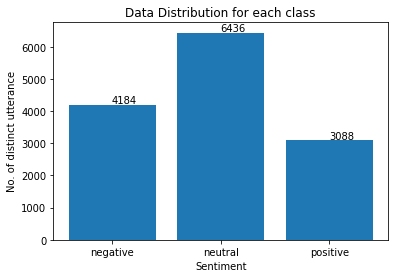

In [ ]:
# Lets check the distribution of data for each class.
data_dist = list(df.sort_values(by=["Sentiment"]).groupby(by=["Sentiment"]).count()["Utterance"])
label = sorted(emotion)

for index, value in enumerate(data_dist):
    plt.text(index,value+50, str(value))

plt.bar(x=label, height=data_dist)
plt.title("Data Distribution for each class")
plt.xlabel("Sentiment")
plt.ylabel("No. of distinct utterance")
plt.show()

From the above bar diagram we can see that maximum utterance belong to class **Neutral** followed by **Negative** and **Positive**. Minimum utterenace belong to class **Positive**. This means data distribution more aligned towards the sentiment : Neutral, Negative and finally Positive. Normally, the dataset appears to be distributed in non uniform manner. So, the model build from such dataset could be biased. But, in real life, human sentiments is not always quantized to certain category. Also, we might not always be positive, and negative towards a situation. Most of our sentiments are neutral. Thus, basesd on the scenario, the distribution present in the dataset resembles the real world scenario and thus fit for our analysis.

### Let's calculate number of words in each utterance


In [ ]:
df["WordList"] = df["Utterance"].str.split(' ')
df["WordCount"] = df["WordList"].str.len()
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,WordList,WordCount
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731","[also, I, was, the, point, person, on, my, com...",16
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442","[You, must’ve, had, your, hands, full.]",6
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389","[That, I, did., That, I, did.]",6
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572","[So, let’s, talk, a, little, bit, about, your,...",9
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917","[My, duties?, , All, right.]",5


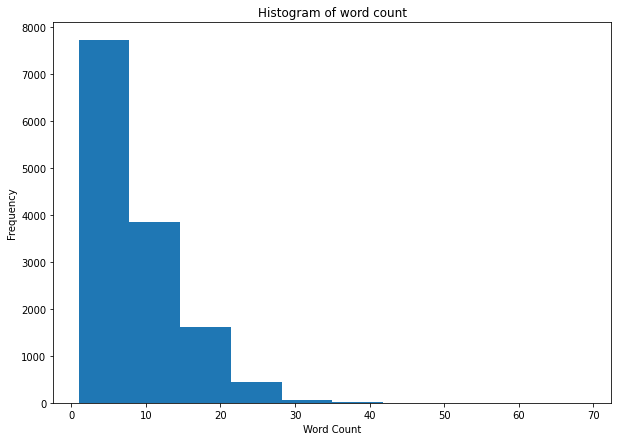

In [ ]:
# Plot histogram of word counts
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df["WordCount"])

plt.title("Histogram of word count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
# Show plot
plt.show()

If we look at the above histogram plot, we can see that maximum utterances have word length from 0-10. Such analysis is useful in order to select maximum word length to create word vector. Based on the maximum word length, we can either truncate the longer utterance or pad the shorter utterance accordingly to create equal length vectors.

## Data Preprocessing
Data Preprocessing is the crucial step in any pattern recognition and machine learning problem. In real world, no data are perfectly fine and clean to use directly. Some level of analysis and preprocessing is always required before it is fed to the machine learning model. There are several steps that are followed during data preprocessing and application of each step depends on the problem domain and nature of data. So, for our emotion recognition project, as we are using text data, we will be using the following pre-processing techniques:

1. Remove null values -- This is already done in the previous steps and since there are no null values, we can move on to the next step.

2. Special character removal -- The primary step in data preprocessing is cleaning the dataset by removing special characters/punctuations. We will perform this by using Regular Expression (RE). It will allow us to determine whether our text data matches the given regular expression and replace it with clean text using str.replace function.  

3. Word Tokenization -- It is the process of splitting raw text data into a list of tokens. This process wil help us understand the data better to develop the model. We will do this with the help of Naural Language Tool Kit (NLTK) function called word_tokenize(). The function will break the text data on the basis of white space and punctuation.

4. Stop words removal -- Stop words are the words that repeatedly appear in the text however they do not add much value to it. Words like is, am, the, our, etc. are some of the examples of Stop Words. Since, they do not have any semantic weight, removing them will shift the focus on more unique data that hold significant information.





### Selecting useful columns
For our analysis, we only need columns Utterance, and Emotion. Thus, we will be using only those columsn to prepare our dataset.

In [ ]:
data = df[["Utterance", "Sentiment"]]
data.head()

,Utterance,Sentiment
0,also I was the point person on my company’s tr...,neutral
1,You must’ve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So let’s talk a little bit about your duties.,neutral
4,My duties? All right.,positive


### Remove Punctuation and Special Characters





In [ ]:
#importing necessary library
import re

In [ ]:
#converting to lowercase
data['lowercase_utterance'] = data['Utterance'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data[['Utterance','lowercase_utterance']].head()

<ipython-input-10-8a2a10a8bab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lowercase_utterance'] = data['Utterance'].apply(lambda x: " ".join(x.lower() for x in x.split()))


,Utterance,lowercase_utterance
0,also I was the point person on my company’s tr...,also i was the point person on my company’s tr...
1,You must’ve had your hands full.,you must’ve had your hands full.
2,That I did. That I did.,that i did. that i did.
3,So let’s talk a little bit about your duties.,so let’s talk a little bit about your duties.
4,My duties? All right.,my duties? all right.


Converting the data to lowercase wil make it uniform and easier to work with.

In [ ]:
#clean punctuations
data['utterance_without_punc'] = data['lowercase_utterance'].str.replace('[^\w\s]',' ')
data[['Utterance', 'lowercase_utterance', 'utterance_without_punc']].head(20)

<ipython-input-11-f767ff14a49f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['utterance_without_punc'] = data['lowercase_utterance'].str.replace('[^\w\s]',' ')
<ipython-input-11-f767ff14a49f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['utterance_without_punc'] = data['lowercase_utterance'].str.replace('[^\w\s]',' ')


,Utterance,lowercase_utterance,utterance_without_punc
0,also I was the point person on my company’s tr...,also i was the point person on my company’s tr...,also i was the point person on my company s tr...
1,You must’ve had your hands full.,you must’ve had your hands full.,you must ve had your hands full
2,That I did. That I did.,that i did. that i did.,that i did that i did
3,So let’s talk a little bit about your duties.,so let’s talk a little bit about your duties.,so let s talk a little bit about your duties
4,My duties? All right.,my duties? all right.,my duties all right
5,"Now you’ll be heading a whole division, so you...","now you’ll be heading a whole division, so you...",now you ll be heading a whole division so you...
6,I see.,i see.,i see
7,But there’ll be perhaps 30 people under you so...,but there’ll be perhaps 30 people under you so...,but there ll be perhaps 30 people under you so...
8,Good to know.,good to know.,good to know
9,We can go into detail,we can go into detail,we can go into detail


In the table above, we can see that the punctuations have been removed from the second and third row, making it more clean.

### Word Tokenization

In [ ]:
#importing necessary library
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
#downloading the necessary functions in nltk library
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data['tokenized_utterance'] = data['utterance_without_punc'].apply(word_tokenize)
data[['Utterance', 'lowercase_utterance', 'utterance_without_punc', 'tokenized_utterance']].head()

<ipython-input-14-a5a0d360973c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_utterance'] = data['utterance_without_punc'].apply(word_tokenize)


,Utterance,lowercase_utterance,utterance_without_punc,tokenized_utterance
0,also I was the point person on my company’s tr...,also i was the point person on my company’s tr...,also i was the point person on my company s tr...,"[also, i, was, the, point, person, on, my, com..."
1,You must’ve had your hands full.,you must’ve had your hands full.,you must ve had your hands full,"[you, must, ve, had, your, hands, full]"
2,That I did. That I did.,that i did. that i did.,that i did that i did,"[that, i, did, that, i, did]"
3,So let’s talk a little bit about your duties.,so let’s talk a little bit about your duties.,so let s talk a little bit about your duties,"[so, let, s, talk, a, little, bit, about, your..."
4,My duties? All right.,my duties? all right.,my duties all right,"[my, duties, all, right]"


Word tokenization will split the words making it easier to work with

### Remove Stop Words



To remove the stopwords, we will use the Naural Language Tool Kit (NLTK) library. Firstly, we will divide our text data into words, compare them to list of stopwords available in the corpus module of this library and finally, remove them if it exists in the list. 

In [ ]:
#importing necessary library
from nltk.corpus import stopwords

In [ ]:
#downloading the 'stopwords' in nltk library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#declare stop words
stopWords = stopwords.words('english')

We can see the list of predefined stopwords available in the NLTK library above. 

In [ ]:
data['cleaned_utterance'] = data['tokenized_utterance'].apply(lambda x: [word for word in x if word not in (stopWords)])
data['cleaned_utterance'] = data['tokenized_utterance'].apply(lambda x: " ".join(x) if len(x)>1 else None)
data[['Utterance', 'lowercase_utterance', 'utterance_without_punc', 'tokenized_utterance', 'cleaned_utterance']].head()

<ipython-input-18-19206ff08df3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_utterance'] = data['tokenized_utterance'].apply(lambda x: [word for word in x if word not in (stopWords)])
<ipython-input-18-19206ff08df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_utterance'] = data['tokenized_utterance'].apply(lambda x: " ".join(x) if len(x)>1 else None)


,Utterance,lowercase_utterance,utterance_without_punc,tokenized_utterance,cleaned_utterance
0,also I was the point person on my company’s tr...,also i was the point person on my company’s tr...,also i was the point person on my company s tr...,"[also, i, was, the, point, person, on, my, com...",also i was the point person on my company s tr...
1,You must’ve had your hands full.,you must’ve had your hands full.,you must ve had your hands full,"[you, must, ve, had, your, hands, full]",you must ve had your hands full
2,That I did. That I did.,that i did. that i did.,that i did that i did,"[that, i, did, that, i, did]",that i did that i did
3,So let’s talk a little bit about your duties.,so let’s talk a little bit about your duties.,so let s talk a little bit about your duties,"[so, let, s, talk, a, little, bit, about, your...",so let s talk a little bit about your duties
4,My duties? All right.,my duties? all right.,my duties all right,"[my, duties, all, right]",my duties all right


We can see in the first line that stop words like: 'what' , 'you' , 'for', etc have been removed, in the table above. The same applies to every row of the table.

In [ ]:
# check for null values after we apply all pre-processing techniques
data.isnull().sum()

Utterance                    0
Sentiment                    0
lowercase_utterance          0
utterance_without_punc       0
tokenized_utterance          0
cleaned_utterance         1555
dtype: int64

We can see that there are 1555 records with NULL values after we applied pre-processing. This means they are no-longer adding value to our analysis. Thus, we will drop these records as well

In [ ]:
# Drop all NULL values rows
data.dropna(axis=0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## Feature Extraction
Feature Extraction is the process of extracting useful features necessary for training our machine learning model by using several techniques. It is also an important step in any pattern recognition and machine learning project because:
1. Feature extraction helps to identify the useful features reducing the dimension of features to be used in training machine learning model. Thus, this also reduces compational complexity at the end.
2. It helps to derive new features which might be more meaningful for our analysis by using the existing set of features.
3. It helps to select or derive features which will help our machine learning model to learn more from the data.
There are different techniques followed for feature extraction which ultimately depends on the nature of project. For NLP based project, most popular methods of feature extraction are:
  - Bag of Words
  - TF-IDF
  - Word2vec

We have used three different feature extraction method mentioned above and trained our SVM model to see how the model performs using different features.

REFERENCES:
https://www.geeksforgeeks.org/feature-extraction-techniques-nlp/

https://www.analyticsvidhya.com/blog/2021/07/feature-extraction-and-embeddings-in-nlp-a-beginners-guide-to-understand-natural-language-processing/


### Bag of Words (BOW) features

In [ ]:
# Feature Extraction Using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# creating the feature matrix 

bow_matrix = CountVectorizer()
bow_features = bow_matrix.fit_transform(data['cleaned_utterance']).toarray()

In [ ]:
data[["Sentiment", "cleaned_utterance"]].head()

,Sentiment,cleaned_utterance
0,neutral,also i was the point person on my company s tr...
1,neutral,you must ve had your hands full
2,neutral,that i did that i did
3,neutral,so let s talk a little bit about your duties
4,positive,my duties all right


In [ ]:
# Visualized BOW features
bow_matrix.fit_transform(["my duties all right"]).toarray()

array([[1, 1, 1, 1]])

In [ ]:
bow_matrix.fit_transform(["so let s talk a little bit about your duties"]).toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1]])

### TF-IDF features

In [ ]:
# Feature Extraction Using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating the feature matrix
tf_matrix = TfidfVectorizer()
tf_features = tf_matrix.fit_transform(data['cleaned_utterance']).toarray()

In [ ]:
# Visualize TF-IDF features
tf_matrix.fit_transform(["my duties all right"]).toarray()

array([[0.5, 0.5, 0.5, 0.5]])

In [ ]:
tf_matrix.fit_transform(["so let s talk a little bit about your duties"]).toarray()

array([[0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.35355339,
        0.35355339, 0.35355339, 0.35355339]])

### Word2Vec Features

In [ ]:
data["cleaned_utterance_list"] = data.cleaned_utterance.str[1:-1].str.split(' ').tolist()

In [ ]:
# Feature Extraction Using Word2Vec

from gensim.models import Word2Vec

word2vec_model = Word2Vec(data['cleaned_utterance_list'],##list of sentences, if you don;t have all the data in RAM, you can give file name to corpus_file 
                          size=1000, ##output size of word emebedding 
                          window=4, ##window size
                          min_count=1, ## ignors all the words with total frquency lower than this
                          workers=5, ##number of workers to use
                          sg=1, ## skip gram
                          hs=0, ## 1 --> hierarchical, 0 --> Negative sampling
                          negative=5, ##How many negative samples
                          alpha=0.03, ##The initial learning rate
                          min_alpha=0.0001, ##Learning rate will linearly drop\
                          #to min_alpha as training progresses.
                          seed = 54, ##random seed
                          iter=10,
                         compute_loss=True)##number of iterations


In [ ]:
data.head()

,Utterance,Sentiment,lowercase_utterance,utterance_without_punc,tokenized_utterance,cleaned_utterance,cleaned_utterance_list
0,also I was the point person on my company’s tr...,neutral,also i was the point person on my company’s tr...,also i was the point person on my company s tr...,"[also, i, was, the, point, person, on, my, com...",also i was the point person on my company s tr...,"[lso, i, was, the, point, person, on, my, comp..."
1,You must’ve had your hands full.,neutral,you must’ve had your hands full.,you must ve had your hands full,"[you, must, ve, had, your, hands, full]",you must ve had your hands full,"[ou, must, ve, had, your, hands, ful]"
2,That I did. That I did.,neutral,that i did. that i did.,that i did that i did,"[that, i, did, that, i, did]",that i did that i did,"[hat, i, did, that, i, di]"
3,So let’s talk a little bit about your duties.,neutral,so let’s talk a little bit about your duties.,so let s talk a little bit about your duties,"[so, let, s, talk, a, little, bit, about, your...",so let s talk a little bit about your duties,"[o, let, s, talk, a, little, bit, about, your,..."
4,My duties? All right.,positive,my duties? all right.,my duties all right,"[my, duties, all, right]",my duties all right,"[y, duties, all, righ]"


In [ ]:
print("The word2vec features for utterance \"{0}\"".\
      format(" ".join(data.iloc[3, 2])))
word2vec_features = word2vec_model.wv[data.iloc[3, -1]]
word2vec_features

The word2vec features for utterance "s o   l e t ’ s   t a l k   a   l i t t l e   b i t   a b o u t   y o u r   d u t i e s ."


array([[ 0.1330549 , -0.16355707,  0.11317386, ..., -0.03471365,
         0.06891493, -0.2423047 ],
       [-0.07925256, -0.22999685, -0.01559349, ...,  0.00083553,
         0.08923047, -0.07365897],
       [-0.05802983, -0.17406917,  0.04201366, ...,  0.0486402 ,
         0.08641972, -0.14859465],
       ...,
       [ 0.02953228, -0.07548721, -0.02167794, ..., -0.07030132,
         0.09404206, -0.10502516],
       [-0.02639442, -0.04569157, -0.12111261, ..., -0.08817914,
        -0.02029708, -0.15809456],
       [-0.01632398,  0.01484693,  0.00733165, ..., -0.03208819,
         0.0115808 , -0.05058937]], dtype=float32)

In [ ]:
# Store the vectors for data in following file
word2vec_filename = "PatternRecognition/" + 'word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in data.iterrows():
        model_vector = (np.mean([word2vec_model[token] for token in row['cleaned_utterance_list']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            header = header +"," + "Sentiment"
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
            line1 = line1 + "," + row["Sentiment"]
        else:
            line1 = ",".join([str(0) for i in range(1000)])
            line1 = line1 + "," + row["Sentiment"]
        word2vec_file.write(line1)
        word2vec_file.write('\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
word2vec_features = pd.read_csv("PatternRecognition/word2vec.csv")

In [ ]:
word2vec_features.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Sentiment
0,0.048207,-0.004277,0.062701,-0.073631,0.027275,0.003710,-0.069035,-0.029194,0.095515,0.018733,...,-0.042741,-0.013984,0.086986,0.007873,-0.054118,0.006866,0.003887,0.044458,0.071479,neutral
1,0.048055,-0.060263,0.099163,-0.078419,0.037886,-0.022325,-0.080933,-0.000072,0.052236,-0.024549,...,-0.043753,-0.021736,0.080815,0.001617,-0.032047,0.041390,0.030776,0.068316,0.043192,neutral
2,0.072713,-0.047607,0.117641,-0.123075,-0.010092,0.016381,-0.064931,-0.040833,0.080134,0.033509,...,-0.103538,-0.000858,0.170037,-0.006261,-0.109342,0.021420,0.027759,0.072830,0.152903,neutral
3,0.053971,-0.057757,0.081370,-0.118362,0.052273,0.006955,-0.087275,0.006062,0.104743,0.029499,...,-0.081745,-0.028842,0.119872,0.031083,-0.061785,0.037159,0.010258,0.057458,0.094034,neutral
4,0.014256,-0.087074,0.098679,-0.063994,-0.004494,-0.027992,-0.067087,-0.010328,0.080664,0.021614,...,-0.077703,-0.077672,0.048772,0.076154,-0.127802,0.004187,-0.015060,-0.036765,0.017421,positive


## Model Building And Evaluation

In [ ]:
import seaborn as sns
from sklearn import model_selection, svm # importing support vector algorithm
from sklearn.metrics import accuracy_score, f1_score # matric for checking the accuracy 
from sklearn.preprocessing import LabelEncoder # Label encoding our Emotions dataframe
from sklearn.metrics import confusion_matrix # To find confusion matrix

### Model building using BOW feature Vectors

In [ ]:
# encoding the different label for different class
le = LabelEncoder()  
labels = le.fit_transform(data["Sentiment"]) #labeling the data set 

#Split the whole feature vectors to train/test
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(bow_features
                                                        , labels,test_size=0.3)

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')  
#c define margin of SVM, small C small margin between two different cluster of 
# SVM # also define the tolerable margin 
#converting the data to the higher dimension to find the support vector 
#classifier
#degree: used by the kernel to transfer the data 
#Gamma: decides that how much curvature we want in a decision boundary i.e in 
#SVM classifier.
SVM.fit(Train_X ,Train_Y)


SVC(gamma='auto', kernel='linear')

### Model evaluation using BOW feature Vectors

In [ ]:
predictions_SVM_bow = SVM.predict(Test_X)

In [ ]:
print("SVM Accuracy Score using BOW features-> ",accuracy_score(predictions_SVM_bow, Test_Y)*100)

SVM Accuracy Score using BOW features->  54.55293472298409


In [ ]:
print("SVM F1-Score using BOW features -> ",f1_score (predictions_SVM_bow, Test_Y, average='weighted')*100)

SVM F1-Score using BOW features ->  56.24876463456086


Text(33.0, 0.5, 'Actual Sentiment Class')

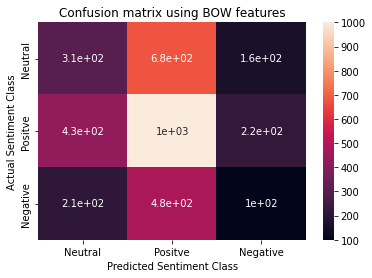

In [ ]:
conf_mat_bow = confusion_matrix(Test_Y, predictions_SVM_bow)
ax = plt.axes()
x_axis_labels = ["Neutral", "Positve", "Negative"] # labels for x-axis
y_axis_labels = ["Neutral", "Positve", "Negative"] # labels for y-axis
sns.heatmap(conf_mat_bow, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, ax = ax)
ax.set_title("Confusion matrix using BOW features")
ax.set_xlabel("Actual Sentiment Class")
ax.set_ylabel("Actual Sentiment Class")

### Model building using TF-IDF feature Vectors

In [ ]:
# encoding the different label for different class
le = LabelEncoder()  
labels = le.fit_transform(data["Sentiment"]) #labeling the data set 

#Split the whole feature vectors to train/test
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(tf_features,\
                                                          labels,test_size=0.3)

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')  
#c define margin of SVM, small C small margin between two different cluster of 
# SVM # also define the tolerable margin 
#converting the data to the higher dimension to find the support vector 
#classifier
#degree: used by the kernel to transfer the data 
#Gamma: decides that how much curvature we want in a decision boundary i.e in 
#SVM classifier.
SVM.fit(Train_X ,Train_Y)

SVC(gamma='auto', kernel='linear')

### Model evaluation using TF-IDF feature Vectors

In [ ]:
predictions_SVM_tf= SVM.predict(Test_X)

In [ ]:
print(" TF-IDF Accuracy Score using SVM -> ",accuracy_score(predictions_SVM_tf, Test_Y)*100)

 TF-IDF Accuracy Score using SVM ->  56.30828304991772


In [ ]:
print(" TF-IDF F1-score Score using SVM -> ",f1_score(predictions_SVM_tf, Test_Y, average='weighted')*100)

 TF-IDF F1-score Score using SVM ->  58.82347313047447


Text(33.0, 0.5, 'Actual Sentiment Class')

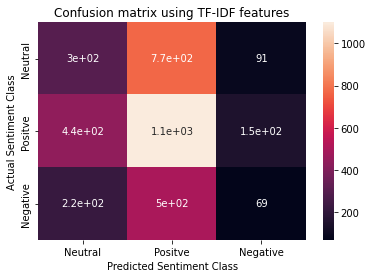

In [ ]:
conf_mat_tf = confusion_matrix(Test_Y, predictions_SVM_tf)
ax = plt.axes()

x_axis_labels = ["Neutral", "Positve", "Negative"] # labels for x-axis
y_axis_labels = ["Neutral", "Positve", "Negative"] # labels for y-axis
sns.heatmap(conf_mat_bow, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, ax = ax)
ax.set_title("Confusion matrix using TF-IDF features")
ax.set_xlabel("Predicted Sentiment Class")
ax.set_ylabel("Actual Sentiment Class")

### Model building using Word2Vec feature Vectors

In [ ]:
# encoding the different label for different class
le = LabelEncoder()  
labels = le.fit_transform(word2vec_features["Sentiment"]) #labeling the data set 

#Split the whole feature vectors to train/test
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(word2vec_features.drop(['Sentiment'], axis=1), labels,test_size=0.3)

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')  
#c define margin of SVM, small C small margin between two different cluster of 
# SVM # also define the tolerable margin 
#converting the data to the higher dimension to find the support vector 
#classifier
#degree: used by the kernel to transfer the data 
#Gamma: decides that how much curvature we want in a decision boundary i.e in 
#SVM classifier.
SVM.fit(Train_X ,Train_Y)

SVC(gamma='auto', kernel='linear')

### Model evaluation using Word2Vec feature Vectors

In [ ]:
predictions_SVM_word2vec = SVM.predict(Test_X)

NameError: ignored

In [ ]:
print("SVM Accuracy Score using Word2Vec -> ",accuracy_score(predictions_SVM_word2vec, Test_Y)*100)

In [ ]:
print("SVM F1-Score using Word2Vec -> ", f1_score(predictions_SVM_word2vec, Test_Y, average='weighted') * 100)

In [ ]:
conf_mat_word2vec = confusion_matrix(Test_Y, predictions_SVM_word2vec)

ax = plt.axes()
x_axis_labels = ["Neutral", "Positve", "Negative"] # labels for x-axis
y_axis_labels = ["Neutral", "Positve", "Negative"] # labels for y-axis
sns.heatmap(conf_mat_bow, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, ax = ax)
ax.set_title("Confusion matrix using Word2Vec features")
ax.set_xlabel("Predicted Sentiment Class")
ax.set_ylabel("Actual Sentiment Class")